# Demonstrando a propriedade de deslocamento da DFT

In [14]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# !jupyter nbconvert --execute --to html "Uso_da_FFT_em_python_Exemplo_2.ipynb"

ImportError: cannot import name '_backports' from 'matplotlib.cbook' (/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py)

In [54]:
#Variáveis
pi = np.pi
f_s = 8000
t_s = 1/f_s
n = np.arange(-3,8)
n_aux = np.linspace(0, 10, 1000)
t = n_aux * t_s

In [55]:
#Funções auxiliares

def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for m in range(N):
        for n in range(N):
            X[m] += x[n] * np.exp(-2j * pi * m * n / N)
    return X

def dft_shifted(x, k):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for m in range(N):
          X[m] = x[m] * np.exp((2j * pi * k * m) / N)
    return X

def safe_angle(z, deg=False, tol=1e-10):
    # Força array para permitir vetorização
    z = np.asarray(z, dtype=np.complex128)

    # Corrige valores reais e imaginários muito pequenos (ruído numérico)
    real = np.where(np.abs(z.real) < tol, 0.0, z.real)
    imag = np.where(np.abs(z.imag) < tol, 0.0, z.imag)

    # Reconstrói o número complexo com +0.0 se aplicável
    z_fixed = real + 1j * imag

    # Retorna o ângulo
    return np.angle(z_fixed, deg=deg)

Suponha que amostramos nossa sequência de entrada do Exemplo 1 da DFT posteriormente com k = 3 amostras. A Figura 3-5 mostra a função de tempo de entrada original,

$x_{in}(t) = sin(2\pi*1000t) + 0.5sin(2\pi*2000t + 3\pi/4)$  (3-10)

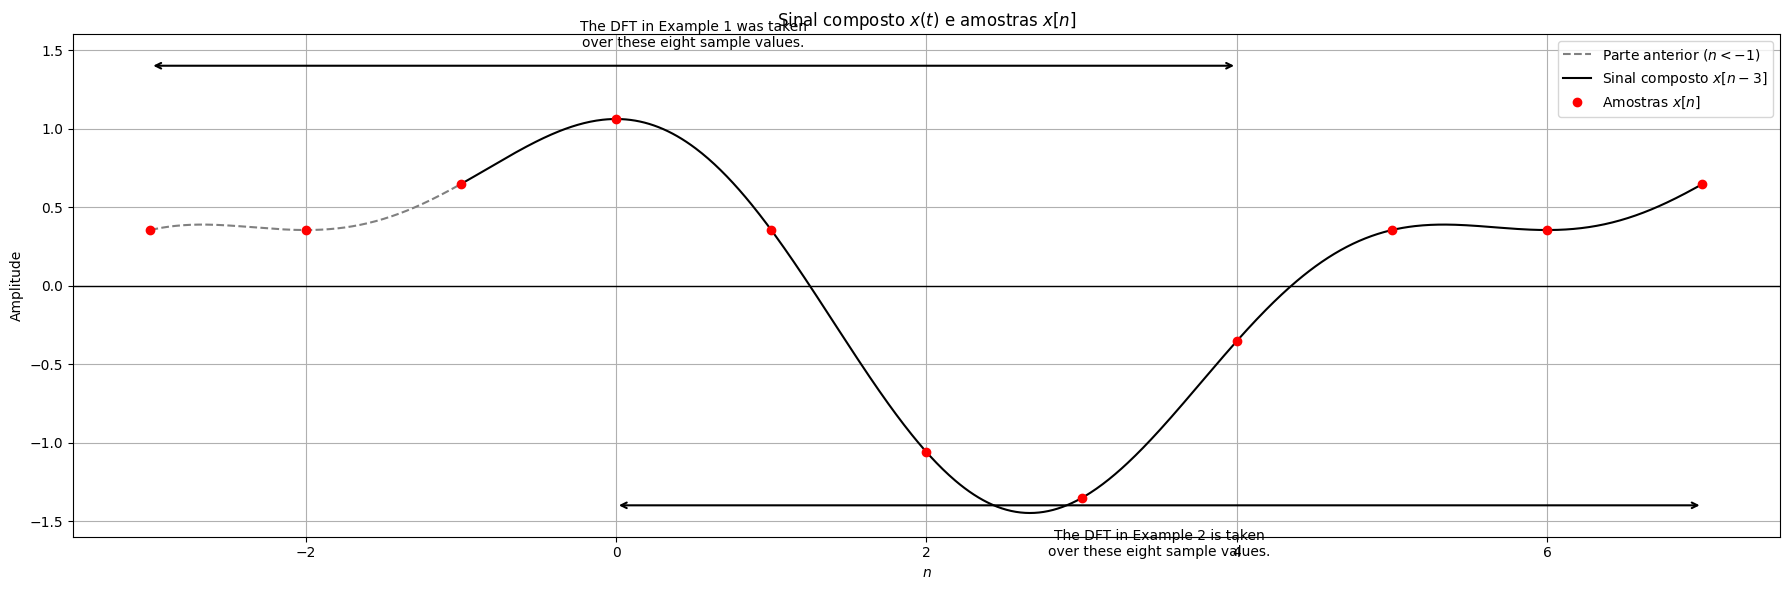

In [57]:
x_n = np.sin(2*pi*1000*(n+3)*t_s) + 0.5*np.sin(2*pi*2000*(n+3)*t_s + 3*pi/4)
x_in = np.sin(2 * np.pi * 1000 * (t+3)) + 0.5 * np.sin(2 * np.pi * 2000 * (t+3) + 3 * np.pi / 4)
mask_cinza = (n_aux - 3 <  -1)
mask_preto = (n_aux - 3 >= -1)

plt.figure(figsize=(18, 6))

# Gráfico cinza até n = -1
plt.plot((n_aux - 3)[mask_cinza], x_in[mask_cinza], '--', label='Parte anterior ($n < -1$)', color='gray')

# Gráfico preto de n = -1 em diante
plt.plot((n_aux - 3)[mask_preto], x_in[mask_preto], '-', label='Sinal composto $x[n-3]$', color='black')

plt.plot(n, x_n, 'ro', label='Amostras $x[n]$')

# Indicador do intervalo do Exemplo 1 (acima)
plt.annotate('', xy=(-3, 1.4), xytext=(4, 1.4),
             arrowprops=dict(arrowstyle='<->', lw=1.5))
plt.text(0.5, 1.5, 'The DFT in Example 1 was taken\nover these eight sample values.',
         ha='center', va='bottom')

# Indicador do intervalo do Exemplo 2 (abaixo)
plt.annotate('', xy=(0, -1.4), xytext=(7, -1.4),
             arrowprops=dict(arrowstyle='<->', lw=1.5))
plt.text(3.5, -1.55, 'The DFT in Example 2 is taken\nover these eight sample values.',
         ha='center', va='top')

# Ajustes do gráfico
plt.axhline(0, color='black', linewidth=1)
plt.grid(True)
plt.xlabel('$n$')
plt.ylabel('Amplitude')
plt.title('Sinal composto $x(t)$ e amostras $x[n]$')
plt.legend()
plt.ylim(-1.6, 1.6)
plt.xlim(-3.5, 7.5)
plt.tight_layout()
plt.show()

Podemos ver que a Figura 3-5 é uma continuação da Figura 3-2(a). Nossa nova sequência x(n) torna-se os
valores representados pelos pontos pretos sólidos na Figura 3-5, cujos valores são: Eq 3-20

In [58]:
for i in range(3, 11):
    print(f'x({i-3}) = {x_n[i]:.4f}')

x(0) = 1.0607
x(1) = 0.3536
x(2) = -1.0607
x(3) = -1.3536
x(4) = -0.3536
x(5) = 0.3536
x(6) = 0.3536
x(7) = 0.6464


Calculando a DFT na Equação 3-20, $X_{shifted}(m)$ é (Eq 3-21):

In [62]:
x_n = np.sin(2*pi*1000*(n)*t_s) + 0.5*np.sin(2*pi*2000*(n)*t_s + 3*pi/4)
x_causal = x_n[3:]
X_m = dft(x_causal)

X_m_shifted = dft_shifted(X_m, 3)
X_mag = [np.abs(x) for x in X_m_shifted ]
X_phase = [safe_angle(x, True) for x in X_m_shifted ]
X_real = [np.real(x) for x in X_m_shifted]
X_imag = [np.imag(x) for x in X_m_shifted]

data = {
    'm':                range(len(X_m_shifted)),
    'Magnitude':        np.round(X_mag, 2), # Using np.abs for clarity with complex numbers
    'Ângulo (graus)':   np.round(X_phase, 2),
    'Parte Real':       np.round(X_real, 4), # Using np.real for clarity
    'Parte Imaginária': np.round(X_imag, 4) # Using np.imag for clarity
}

df = pd.DataFrame(data)
df = df.set_index('m')
display(df)

,Magnitude,Ângulo (graus),Parte Real,Parte Imaginária
m,,,,
0,0.0,0.0,0.0000,0.0000
1,4.0,45.0,2.8284,2.8284
2,2.0,-45.0,1.4142,-1.4142
3,0.0,0.0,0.0000,0.0000
4,0.0,0.0,0.0000,0.0000
5,0.0,0.0,0.0000,-0.0000
6,2.0,45.0,1.4142,1.4142
7,4.0,-45.0,2.8284,-2.8284


Os valores na Eq. (3-21) são ilustrados como os pontos na Figura abixo. Observe que a Figura (a) é idêntica à Figura 3-4(a). A Equação (3-19) nos disse que a magnitude de $X_{shifted}(m)$ deveria permanecer inalterada em relação à de $X(m)$. É um pensamento reconfortante, não é? Não esperaríamos que a magnitude da DFT do nosso xin(t) periódico original mudasse apenas porque o amostramos em um intervalo de tempo diferente. A fase do resultado da DFT, no entanto, muda dependendo do instante em que começamos a amostrar $x_{in}(t)$.

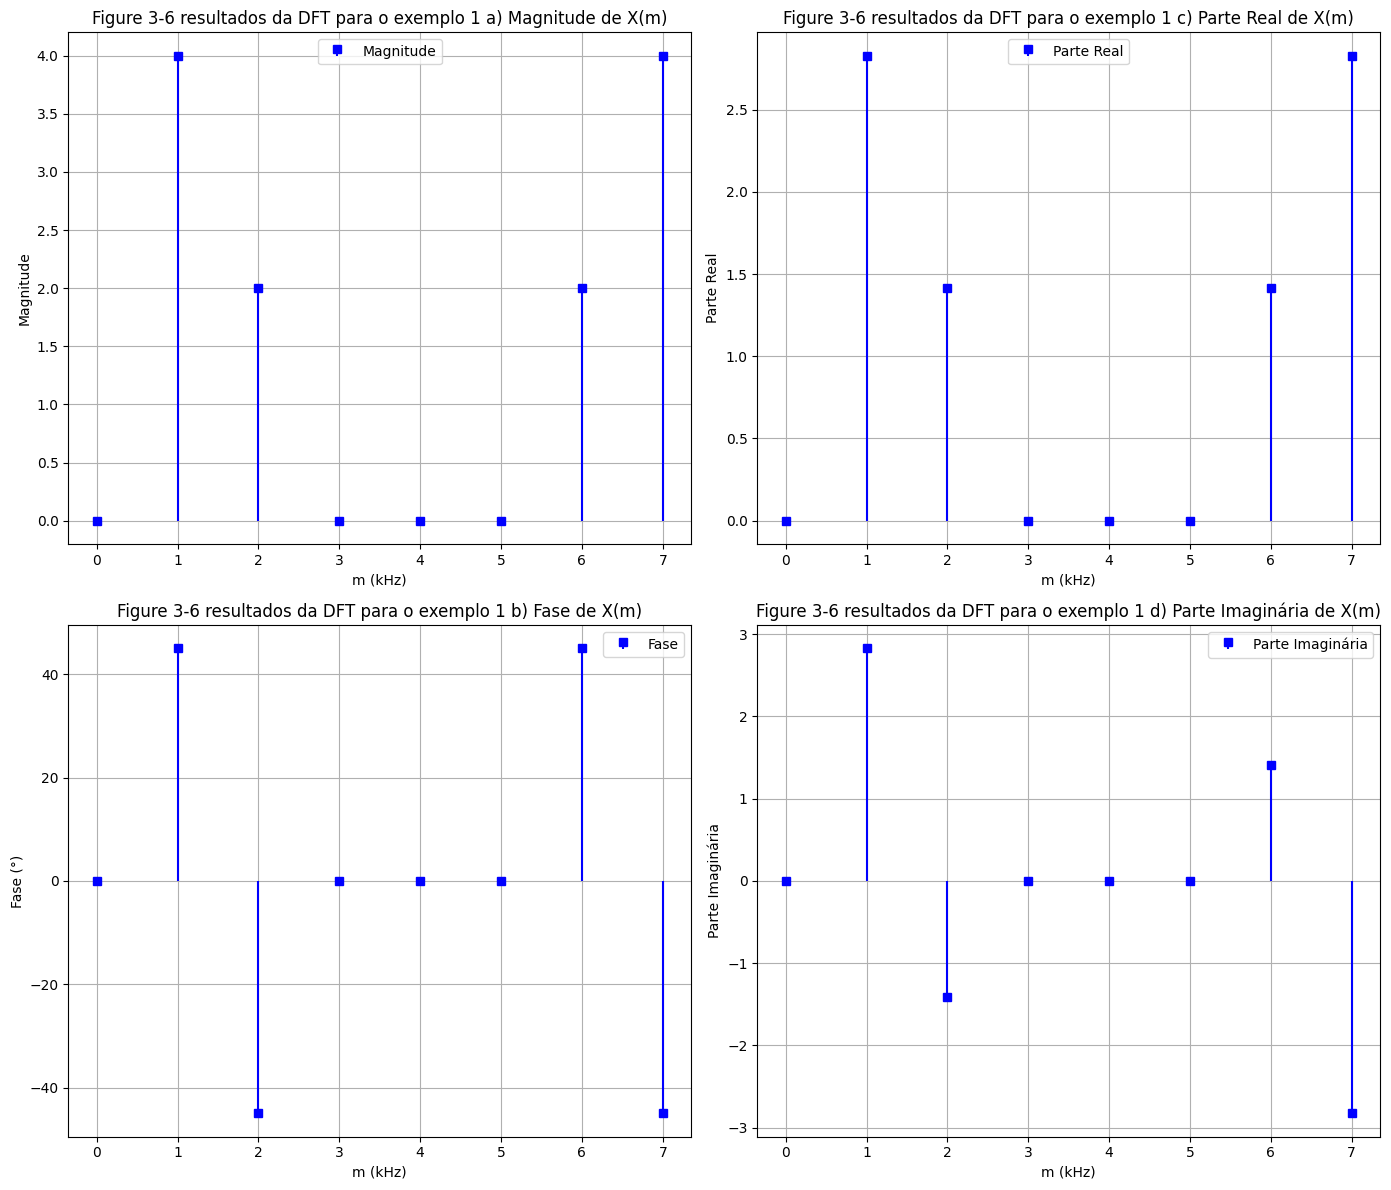

In [61]:
n_time = np.arange(0, 8)

plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
plt.stem(n_time, X_mag, linefmt='b-', markerfmt='bs', basefmt=' ', label='Magnitude')
plt.xlabel('m (kHz)')
plt.ylabel('Magnitude')
plt.title('Figure 3-6 resultados da DFT para o exemplo 1 a) Magnitude de X(m)')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.stem(n_time, X_phase, linefmt='b-', markerfmt='bs', basefmt=' ', label='Fase')
plt.xlabel('m (kHz)')
plt.ylabel('Fase (°)')
plt.title('Figure 3-6 resultados da DFT para o exemplo 1 b) Fase de X(m)')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.stem(n_time, X_real, linefmt='b-', markerfmt='bs', basefmt=' ', label='Parte Real')
plt.xlabel('m (kHz)')
plt.ylabel('Parte Real')
plt.title('Figure 3-6 resultados da DFT para o exemplo 1 c) Parte Real de X(m)')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.stem(n_time, X_imag, linefmt='b-', markerfmt='bs', basefmt=' ', label='Parte Imaginária')
plt.xlabel('m (kHz)')
plt.ylabel('Parte Imaginária')
plt.title('Figure 3-6 resultados da DFT para o exemplo 1 d) Parte Imaginária de X(m)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Observando o componente m = 1 de $X_{shifted}(m)$, por exemplo, podemos verificar novamente se os valores de fase na Figura 3-6(b) estão corretos. Usando a Eq. (3-19) e lembrando que X(1) do Exemplo 1 de DFT tinha magnitude 4 em um ângulo de fase de -90° (ou -π/2 radianos), k = 3 e N = 8, de modo que


$X_{shifted}(1) = e^{j\pi km/N} * X(1) = e^{j\pi 3*1/N} * 4e^{-j\pi/2} = 4e^{j(6\pi/8 - 4\pi/8)} = 4e^{j\pi/4}$


Portanto, $X_{shifted}(1)$ tem uma magnitude de 4 e um ângulo de fase de π/4 ou +45°, que é o que pretendemos provar usando a Eq. (3-19).